# Data analysis project

## Introduction

We see a lot of support in the danish educational system such as the State Educational Fund (SU) and generally free education. This leads us to believe that danish people have equal opportunities to study - and maybe even to complete an education. 

In this project we want to analyse whether or not parents level of education affects their childrens chances of completing their studies. If it is true that people in Denmark all have the same opportunities we expect the individuals level of education to be unaffected by their parents' level of education. 

# Read and clean data

Import and set magics:

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

## Education data

We have chosen our data from Danmarks Statistik from the table STATUS42. This data shows individuals level of education given their parents' level of education. The individuals are between 25 and 45 years old and  each year we observe about 1,5 million individuals. 

We have chosen to devide the parents level of education such that: 

"Grundskole" and "Uoplyst mv." are given the variable name "Unskilled".

"Gymnasiale uddannelser" and "Adgangsgivende uddannelsesforløb" are given the variable name "Lowedu".

"Erhvervsfaglige uddannelser", "Korte videregående uddannelser" and "Mellemlange videregående uddannelser" are given the variable name "Midedu".

"Bacheloruddannelser", "Lange videregående uddannelser" and "Ph.d. og forskeruddannelser" are given the name "Highedu". 

In [24]:
# Loading data
edu = pd.read_excel('data.xlsx', index_col='Udd')
edu.index.names = ['Level of education']
edu.head()

,Aar,I alt,H10 Grundskole,H20 Gymnasiale uddannelser,H30 Erhvervsfaglige uddannelser,H35 Adgangsgivende uddannelsesforløb,"H40 Korte videregående uddannelser, KVU","H50 Mellemlange videregående uddannelser, MVU","H60 Bacheloruddannelser, BACH","H70 Lange videregående uddannelser, LVU",H80 Ph.d. og forskeruddannelser,H90 Uoplyst mv.
Level of education,,,,,,,,,,,,
FULDFØRT VIDEREGÅENDE UDDANNELSE,2005,100,16.44,1.13,36.66,0.01,3.93,25.00,0.92,11.82,0.22,3.86
IGANGVÆRENDE VIDEREGÅENDE UDDANNELSE,2005,100,13.16,1.57,33.38,0.02,3.68,23.60,0.86,9.99,0.26,13.48
INGEN VIDEREGÅENDE UDDANNELSE,2005,100,37.87,0.69,44.82,0.01,2.60,8.80,0.25,1.69,0.02,3.25
AFBRUDT VIDEREGÅENDE UDDANNELSE,2005,100,19.38,1.55,41.00,0.00,3.99,19.99,0.76,7.85,0.15,5.33
FULDFØRT VIDEREGÅENDE UDDANNELSE,2006,100,15.49,1.18,36.72,0.01,4.00,25.53,0.95,12.00,0.24,3.88


In [33]:
# Creating new education variables for the parents' level of education
edu["Year"] = (edu["Aar"])
edu["Unskilled"] = (edu["H10 Grundskole"]+edu["H90 Uoplyst mv."])
edu["Lowedu"] = (edu["H20 Gymnasiale uddannelser"]+edu["H35 Adgangsgivende uddannelsesforløb"])
edu["Midedu"] = (edu["H30 Erhvervsfaglige uddannelser"]+edu["H40 Korte videregående uddannelser, KVU"]+edu["H50 Mellemlange videregående uddannelser, MVU"])
edu["Highedu"] = (edu["H60 Bacheloruddannelser, BACH"]+edu["H70 Lange videregående uddannelser, LVU"]+edu["H80 Ph.d. og forskeruddannelser"])
edu.head()

,Aar,I alt,H10 Grundskole,H20 Gymnasiale uddannelser,H30 Erhvervsfaglige uddannelser,H35 Adgangsgivende uddannelsesforløb,"H40 Korte videregående uddannelser, KVU","H50 Mellemlange videregående uddannelser, MVU","H60 Bacheloruddannelser, BACH","H70 Lange videregående uddannelser, LVU",H80 Ph.d. og forskeruddannelser,H90 Uoplyst mv.,Year,Unskilled,Lowedu,Midedu,Highedu
Level of education,,,,,,,,,,,,,,,,,
FULDFØRT VIDEREGÅENDE UDDANNELSE,2005,100,16.44,1.13,36.66,0.01,3.93,25.00,0.92,11.82,0.22,3.86,2005,20.30,1.14,65.59,12.96
IGANGVÆRENDE VIDEREGÅENDE UDDANNELSE,2005,100,13.16,1.57,33.38,0.02,3.68,23.60,0.86,9.99,0.26,13.48,2005,26.64,1.59,60.66,11.11
INGEN VIDEREGÅENDE UDDANNELSE,2005,100,37.87,0.69,44.82,0.01,2.60,8.80,0.25,1.69,0.02,3.25,2005,41.12,0.70,56.22,1.96
AFBRUDT VIDEREGÅENDE UDDANNELSE,2005,100,19.38,1.55,41.00,0.00,3.99,19.99,0.76,7.85,0.15,5.33,2005,24.71,1.55,64.98,8.76
FULDFØRT VIDEREGÅENDE UDDANNELSE,2006,100,15.49,1.18,36.72,0.01,4.00,25.53,0.95,12.00,0.24,3.88,2006,19.37,1.19,66.25,13.19


In [83]:
# Deleting the old and unnecessary variables
newedu1 = edu.drop(['Aar', 'I alt', 'H10 Grundskole', 'H20 Gymnasiale uddannelser',
                    'H30 Erhvervsfaglige uddannelser', 'H35 Adgangsgivende uddannelsesforløb',
                    'H40 Korte videregående uddannelser, KVU',
                    'H50 Mellemlange videregående uddannelser, MVU',
                    'H60 Bacheloruddannelser, BACH', 'H70 Lange videregående uddannelser, LVU',
                    'H80 Ph.d. og forskeruddannelser', 'H90 Uoplyst mv.'], 1)

# Translating names of level of education
newedu = newedu1.rename(index = {"FULDFØRT VIDEREGÅENDE UDDANNELSE": "Completed further education",
                                "IGANGVÆRENDE VIDEREGÅENDE UDDANNELSE": "Ongoing further education",
                                "INGEN VIDEREGÅENDE UDDANNELSE": "No further education",
                                "AFBRUDT VIDEREGÅENDE UDDANNELSE": "Disrupted further education"})
newedu.head()

,Year,Unskilled,Lowedu,Midedu,Highedu
Level of education,,,,,
Completed further education,2005,20.30,1.14,65.59,12.96
Ongoing further education,2005,26.64,1.59,60.66,11.11
No further education,2005,41.12,0.70,56.22,1.96
Disrupted further education,2005,24.71,1.55,64.98,8.76
Completed further education,2006,19.37,1.19,66.25,13.19


# Data analysis

We start of by calculating the mean within every level of education given their parents' level of education. This gives us the share of people with parents that have a certain level of education given their own level of education. 

In [84]:
# Calculating the mean within every group of education in the period from 2005 to 2018
newedu.groupby('Level of education').agg(['mean']).round(2)
education = newedu.drop(['Year'],1)
education.head()

,Unskilled,Lowedu,Midedu,Highedu
Level of education,,,,
Completed further education,20.30,1.14,65.59,12.96
Ongoing further education,26.64,1.59,60.66,11.11
No further education,41.12,0.70,56.22,1.96
Disrupted further education,24.71,1.55,64.98,8.76
Completed further education,19.37,1.19,66.25,13.19


To visualize the level of education given the parents' level of education we create a simple figure:

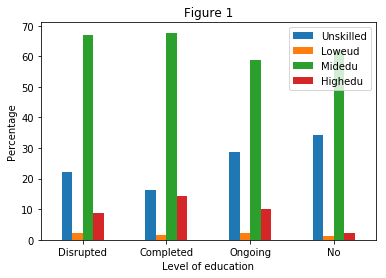

In [85]:
data = education.groupby('Level of education').agg(['mean']).round(2)
data.columns = data.columns.droplevel(1)

del data.index.name
data.index = ['Dirupted', 'Completed', 'Ongoing', 'No']
data = pd.DataFrame({'Unskilled': Unskilled, 'Loweud': Lowedu, 'Midedu': Midedu, 'Highedu': Highedu}, index = index)
ax = data.plot.bar(rot=0)
ax.set_title('Figure 1');
ax.set_ylabel('Percentage');
ax.set_xlabel('Level of education');

It is clear to see that people who completed further education have the highest share of parents with a high level of education and the lowest share of parents who are unskilled. 

People who have no further education have the lowest share of highly educated parents and the highest share of uneducated parents. 

People who are currently under further education have the lowest level of parents with a medium level of education and a relatively high level of parents who are unskilled or with a high education. 

Thus we can conclude that it is far more likely to complete further education if your parents have done the same. On the other hand it is less possible to complete or even attempt to study further education if your parents are unskilled. 

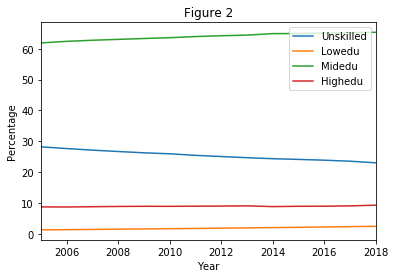

In [89]:
# Plotting the parents' level of education for all indivduals over time
parentsedu = newedu.groupby('Year').agg(['mean']).round(2)
parentsedu.columns = parentsedu.columns.droplevel(1)
parentsedu.reset_index(level=0, inplace=True)

fig, ax = plt.subplots()
parentsedu.plot(x = 'Year', y = 'Unskilled', ax = ax)
parentsedu.plot(x = 'Year', y = 'Lowedu', ax = ax)
parentsedu.plot(x = 'Year', y = 'Midedu', ax = ax)
parentsedu.plot(x = 'Year', y = 'Highedu', ax = ax)
ax.set_title('Figure 2');
ax.set_ylabel('Percentage');

In figure 2 we see that the generel level of education among parents have increased over the last 13 years. This is importent to have in mind when concluding from following findings.

In [100]:
parentsedu

,Year,Unskilled,Lowedu,Midedu,Highedu
0,2005,28.19,1.24,61.86,8.70
1,2006,27.62,1.32,62.38,8.68
2,2007,27.11,1.39,62.73,8.76
3,2008,26.66,1.48,63.02,8.85
4,2009,26.24,1.56,63.30,8.90
5,2010,25.92,1.64,63.56,8.88
6,2011,25.42,1.71,63.93,8.93
7,2012,25.04,1.80,64.20,8.97
8,2013,24.66,1.91,64.39,9.04
9,2014,24.33,1.99,64.88,8.80


This table shows that the share of people with unskilled parents have decreased with 5.2 percentage points during the period. The share of individuals with low-, medium- and highly educated parents have respectively increased with 1.2, 3.5 and 0.5 percentage points. 

In [53]:
# Creating a dataset that only contains people who completed further education
newedu_copy = newedu.copy()
newedu_copy.drop(['Disrupted further education', 'Ongoing further education', 'No further education'], inplace = True)
newedu_copy

,Year,Unskilled,Lowedu,Midedu,Highedu
Level of education,,,,,
Completed further education,2005,20.30,1.14,65.59,12.96
Completed further education,2006,19.37,1.19,66.25,13.19
Completed further education,2007,18.55,1.25,66.76,13.43
Completed further education,2008,17.83,1.30,67.18,13.68
Completed further education,2009,17.12,1.36,67.57,13.95
Completed further education,2010,16.50,1.42,67.85,14.23
Completed further education,2011,15.97,1.50,68.04,14.49
Completed further education,2012,15.48,1.60,68.16,14.77
Completed further education,2013,15.08,1.67,68.23,15.03


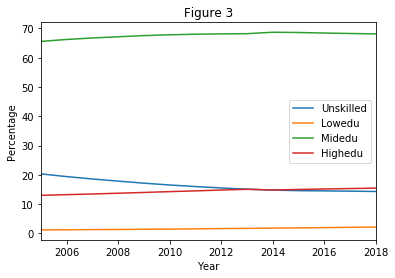

In [97]:
# Plotting the parents' level of education over time for people who completed further education
fig, ax = plt.subplots()
newedu_copy.plot(x = 'Year', y = 'Unskilled', ax = ax)
newedu_copy.plot(x = 'Year', y = 'Lowedu', ax = ax)
newedu_copy.plot(x = 'Year', y = 'Midedu', ax = ax)
newedu_copy.plot(x = 'Year', y = 'Highedu', ax = ax)
ax.set_title('Figure 3');
ax.set_ylabel('Percentage');

We clearly see that the parents overall level of education has grown in the period from 2005 to 2018. The share of individuals with unskilled parents has decreased since 2005 whereas both individuals with parents who are low-, medium- and highly educated has proportionally increased.

If we compare this to the overall trend in the parants' level of education, we see that the share of parents with a high level of education increases more among people who compleated further education than in general. Similarly the share of unskilled parants decrease more among the individuals that completed further education. 

In [101]:
# Creating a dataset that only contains people who did not finish further education
newedu_copytwo = newedu.copy()
newedu_copytwo.drop(['Disrupted further education', 'Ongoing further education', 'Completed further education'], inplace = True)
newedu_copytwo

,Year,Unskilled,Lowedu,Midedu,Highedu
Level of education,,,,,
No further education,2005,41.12,0.70,56.22,1.96
No further education,2006,39.91,0.76,57.32,2.00
No further education,2007,38.76,0.82,58.34,2.07
No further education,2008,37.60,0.89,59.40,2.13
No further education,2009,36.45,0.96,60.42,2.16
No further education,2010,35.32,1.05,61.40,2.22
No further education,2011,34.27,1.14,62.31,2.29
No further education,2012,33.34,1.24,63.09,2.34
No further education,2013,32.47,1.34,63.78,2.41


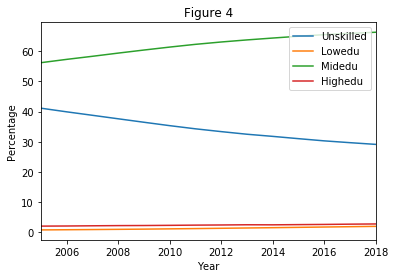

In [102]:
# Plotting the parents' level of education over time for people who don't have further education
figtwo, ax = plt.subplots()
newedu_copytwo.plot(x = 'Year', y = 'Unskilled', ax = ax)
newedu_copytwo.plot(x = 'Year', y = 'Lowedu', ax = ax)
newedu_copytwo.plot(x = 'Year', y = 'Midedu', ax = ax)
newedu_copytwo.plot(x = 'Year', y = 'Highedu', ax = ax)
ax.set_title('Figure 4');
ax.set_ylabel('Percentage');

In this figure we see that the share of parents without an education has decreased approxemately as much as the share of parents with a medium level of education has increased. Both parents with a low and high level of education have not changed much since 2005.

We notes that the share of people with unskilled parents derease a lot among people without further education. It is important to note that the share of people with unskilled parents is 6 percantage points higher in 2018 among people without further education than the overall share in 2018. 

# Conclusion

In the beginning of this project we wanted to examine if individuals level of education is affected by their parents amount of completed education. Do children who grew up with uneducated parents have the same chances of finishing further education as children who grew up in homes with well educated parents? 
That is not what we find in this analysis. Our findings show that if parents are uneducated, the possibility of completing - or even attempt - further education is lower. 

However we see that the share of parents who are unskilled is decreasing which means that the amount of parents who are educating themselves is rising, which could lead to an even bigger share of educated people in the future if this development continues. 

A big amount of the share of people who complete further education often come from a highly educated family, which could be a sign of a stronger social heritage over time. 